<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   youtuber                                 995 non-null    object 
 2   subscribers                              995 non-null    int64  
 3   video_views                              995 non-null    float64
 4   category                                 949 non-null    object 
 5   title                                    995 non-null    object 
 6   uploads                                  995 non-null    int64  
 7   country                                  873 non-null    object 
 8   abbreviation                             873 non-null    object 
 9   channel_type                             965 non-null    object 
 10  video_views_rank                         994 non-n

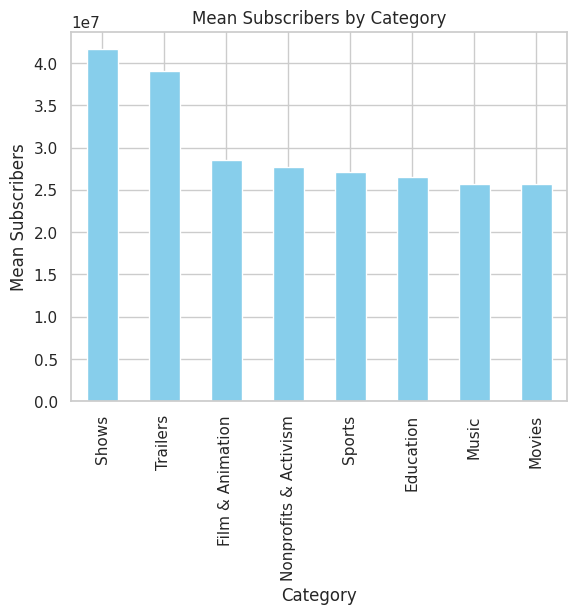

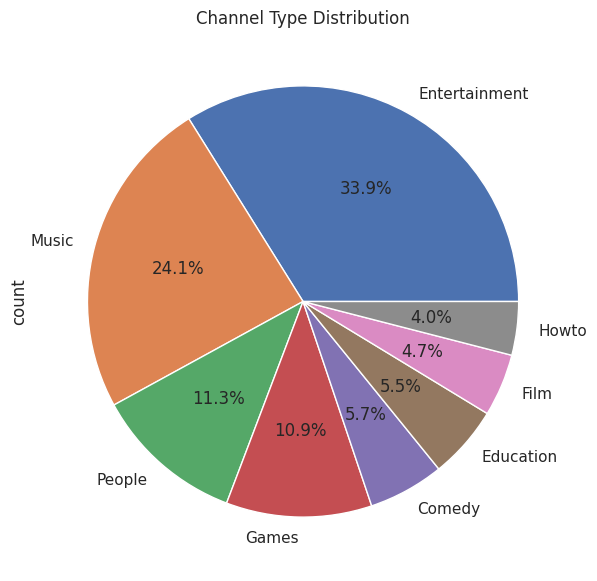

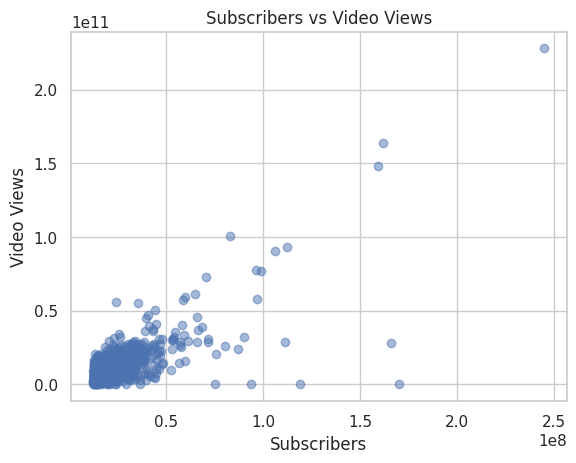

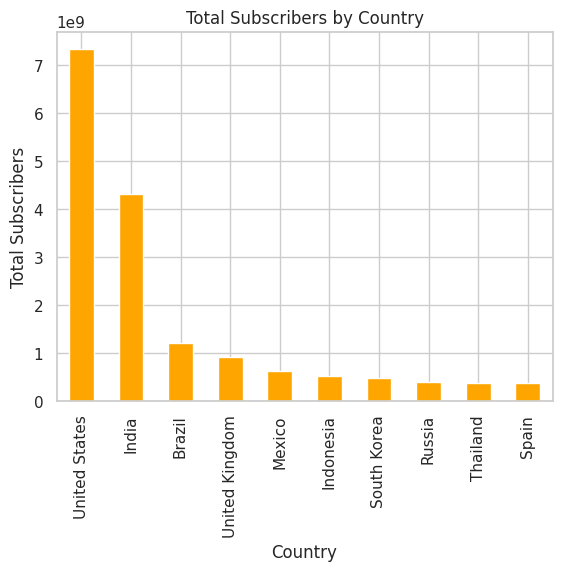

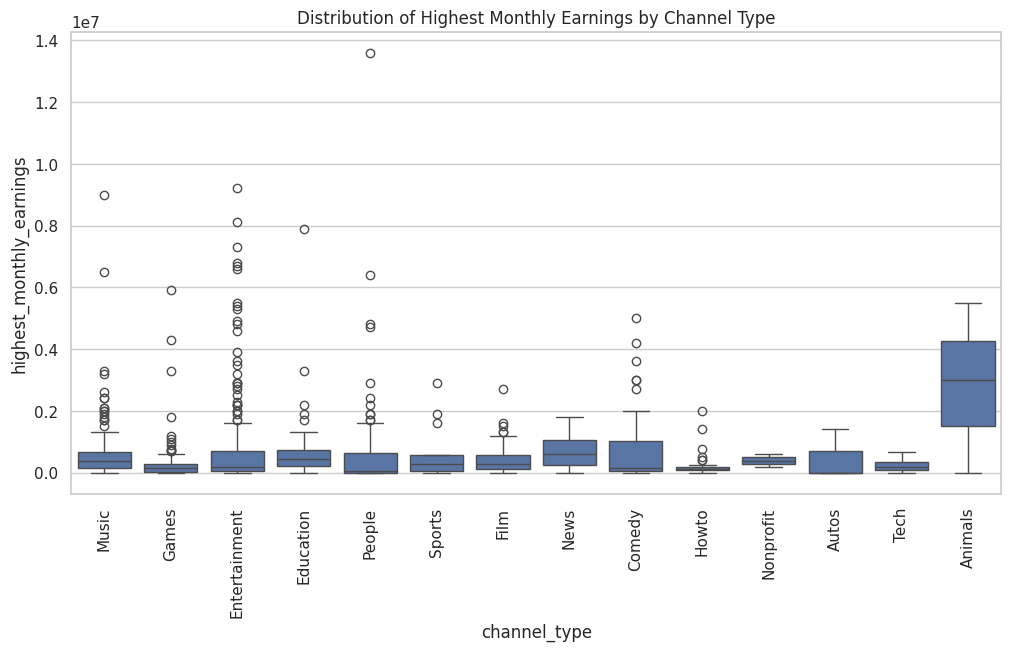

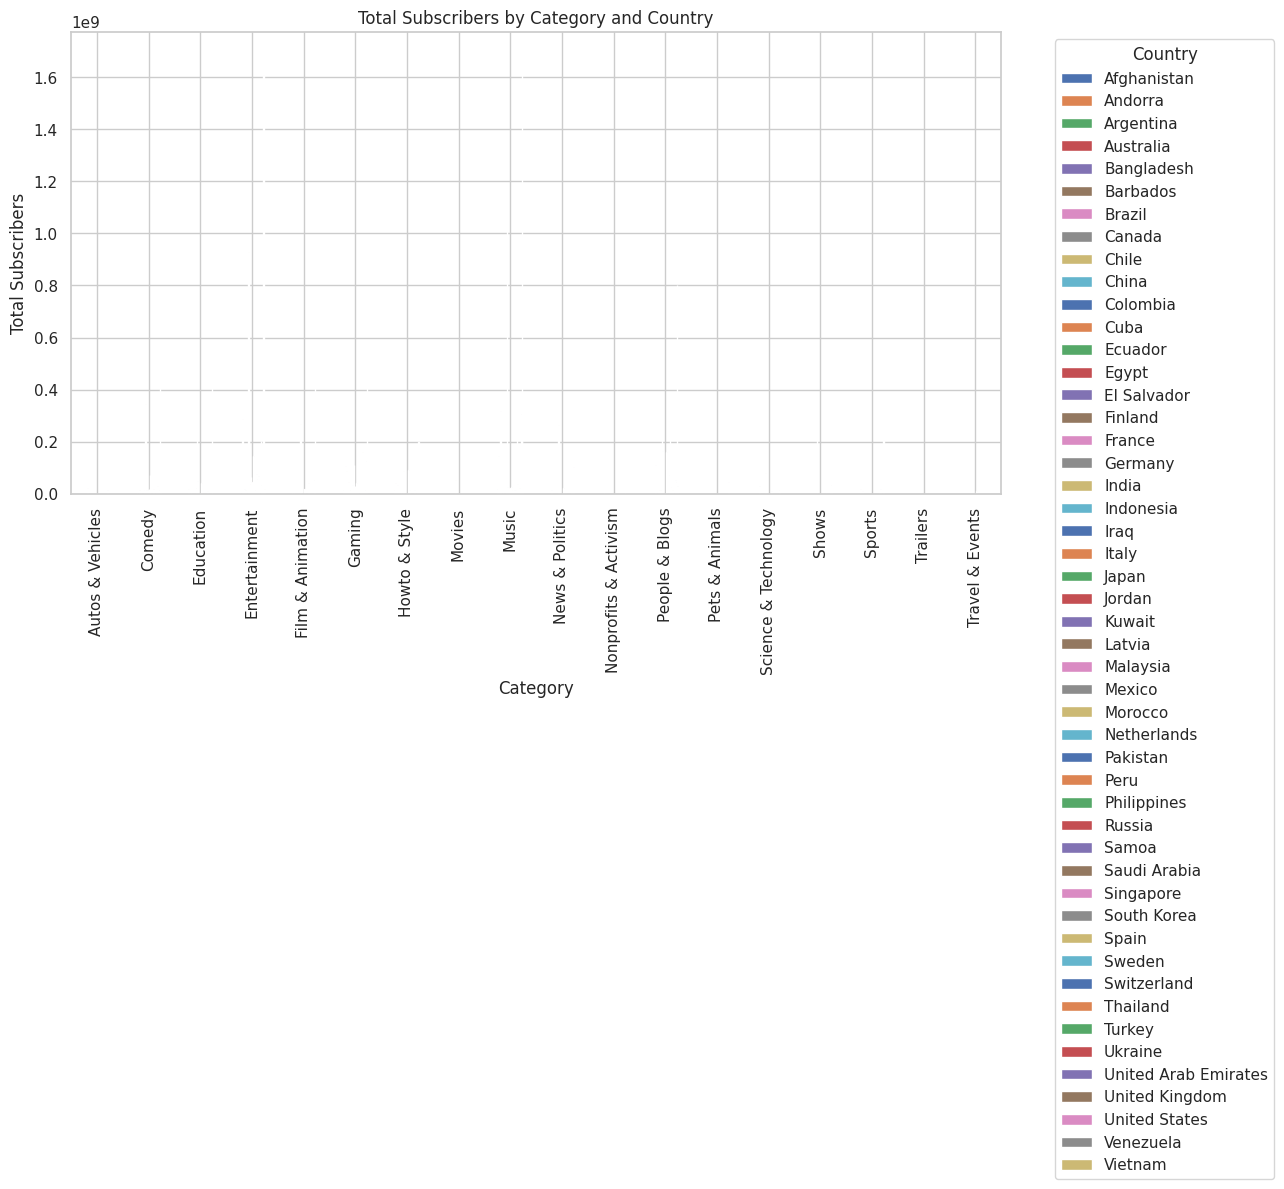

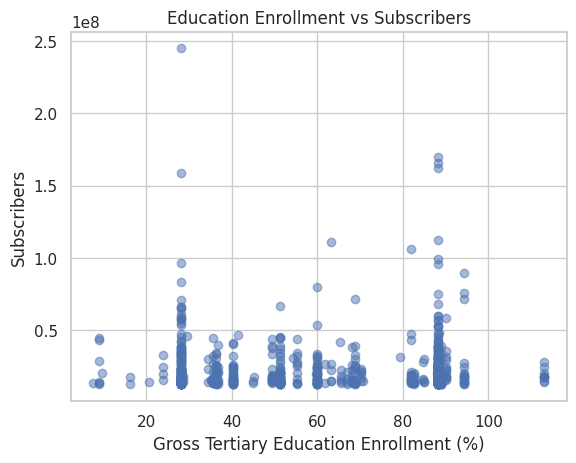

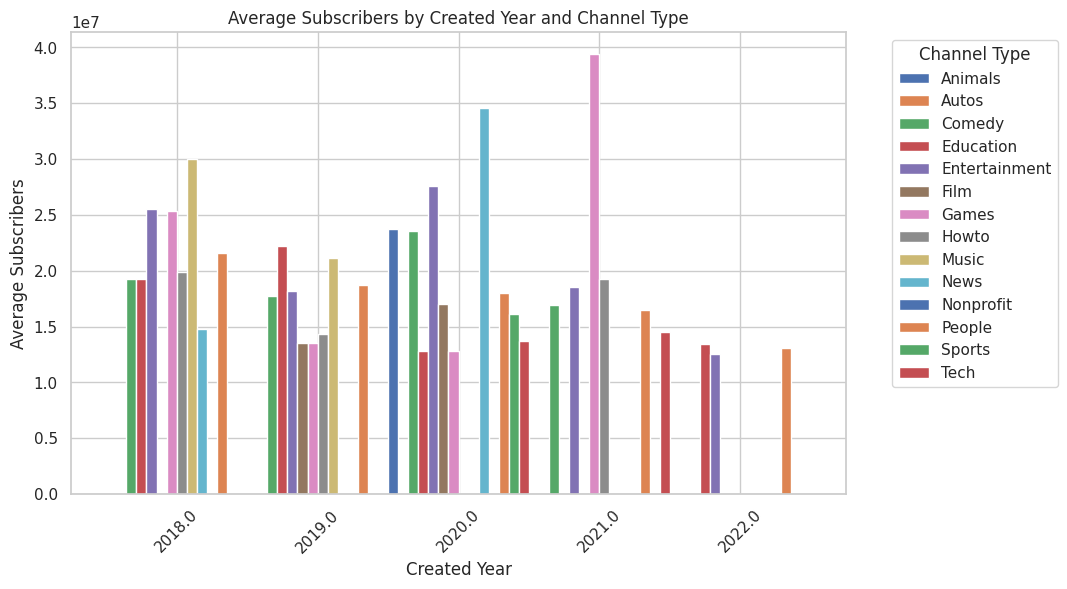

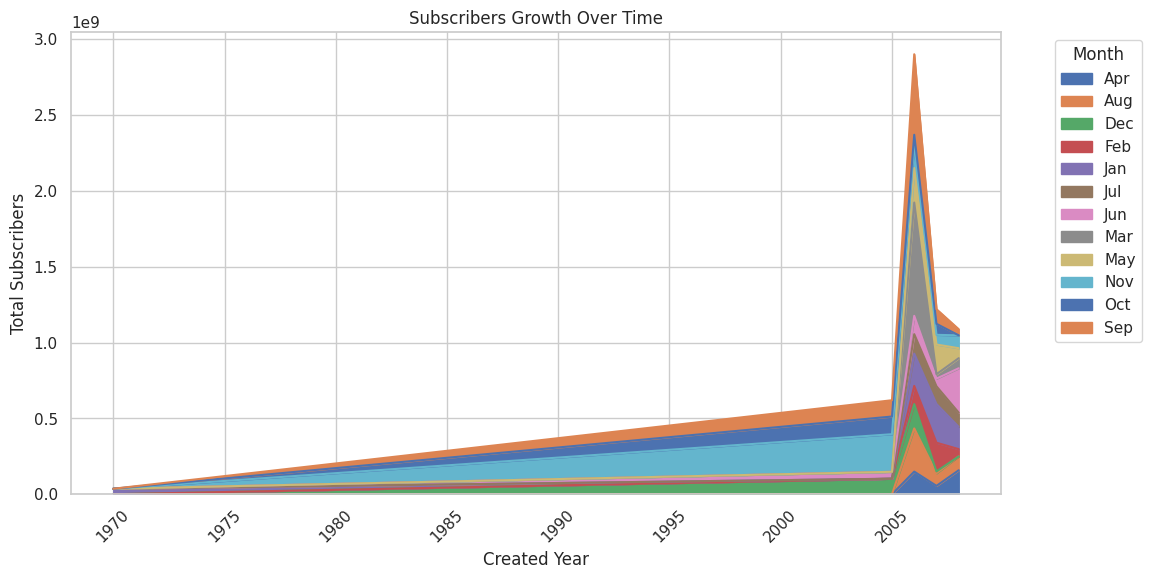

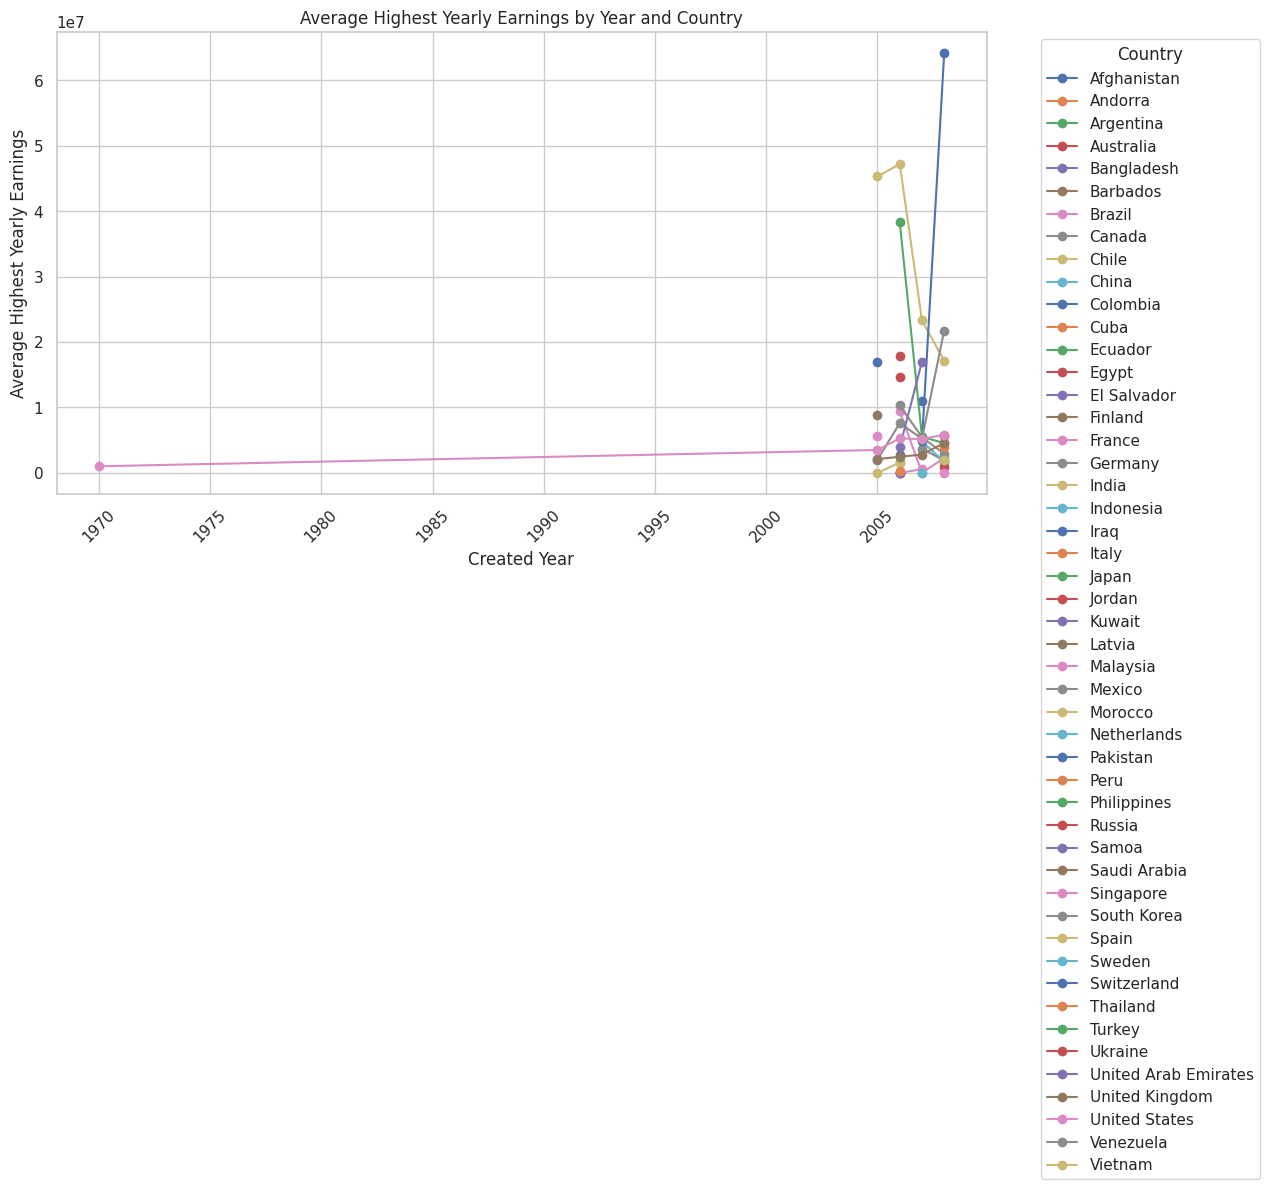

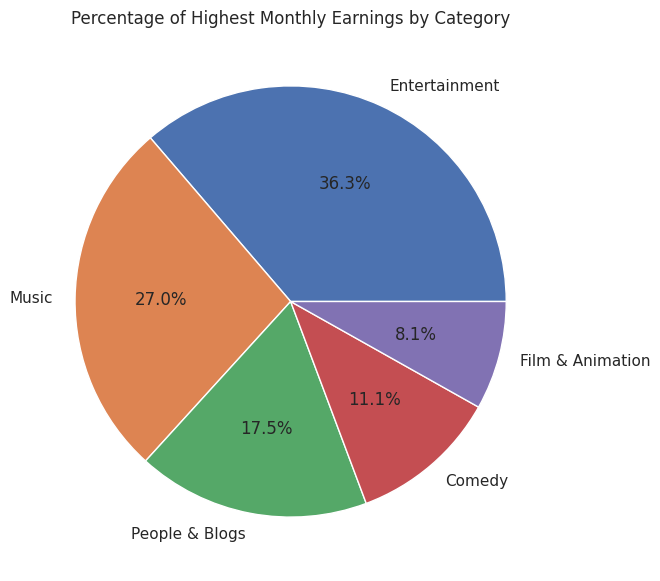

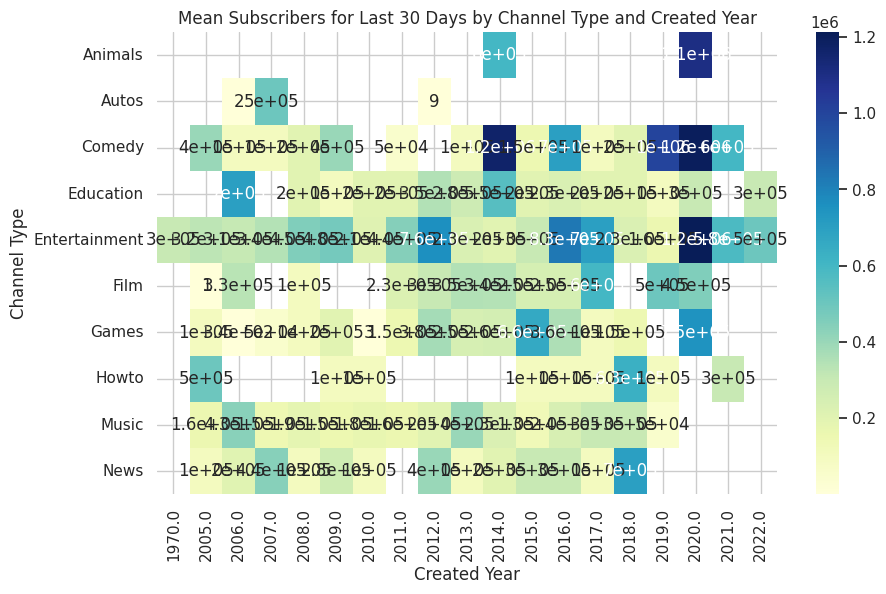

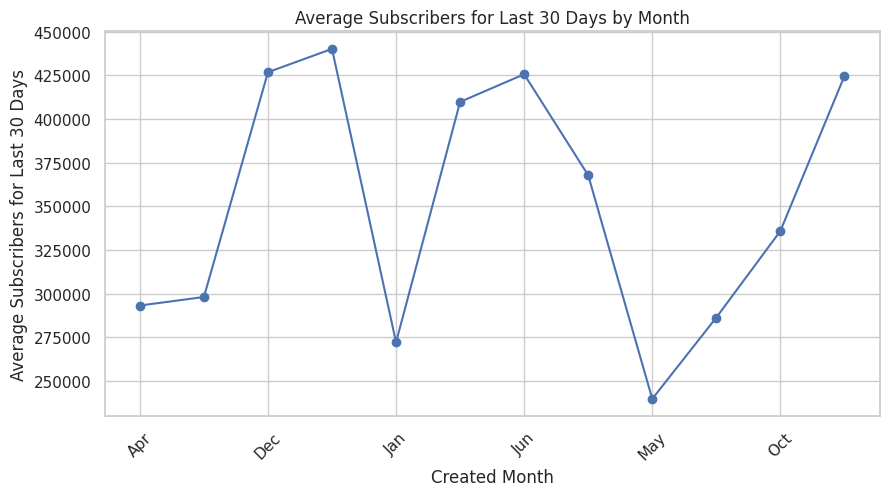

In [2]:
# ==============================
# GLOBAL YOUTUBE STATISTICS ANALYSIS
# ==============================

# ------------------------------
# 1. Import Libraries
# ------------------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Optional: set seaborn style
sns.set(style="whitegrid")

# ------------------------------
# 2. Load Dataset
# ------------------------------
df = pd.read_csv('/content/drive/MyDrive/Project Files/Global YouTube Statistics.csv', encoding="latin1")

# Preview the dataset
df.head()

# ------------------------------
# 3. Data Cleaning & Preparation
# ------------------------------
# Standardize column names: lowercase, replace spaces with underscores, strip extra spaces
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Check info and basic statistics
df.info()
df.describe()

# Check for duplicates
df.duplicated().sum()

# Format floats for better readability
pd.set_option("display.float_format", "{:.2f}".format)

# ------------------------------
# 4. Exploratory Data Analysis (EDA)
# ------------------------------

# 4.1 Mean Subscribers by Category
category_subscribers_mean = df.groupby('category')['subscribers'].mean().sort_values(ascending=False)
category_subscribers_mean.head(8).plot(kind='bar', color='skyblue')
plt.xlabel('Category')
plt.ylabel('Mean Subscribers')
plt.title('Mean Subscribers by Category')
plt.show()

# 4.2 Channel Type Distribution
channel_type_counts = df['channel_type'].value_counts()
channel_type_counts.head(8).plot(kind='pie', autopct='%1.1f%%', figsize=(7,7))
plt.title('Channel Type Distribution')
plt.show()

# 4.3 Subscribers vs Video Views
plt.scatter(df["subscribers"], df["video_views"], alpha=0.5)
plt.xlabel("Subscribers")
plt.ylabel("Video Views")
plt.title("Subscribers vs Video Views")
plt.show()

# 4.4 Total Subscribers by Country
country_subscribers_total = df.groupby('country')['subscribers'].sum().sort_values(ascending=False)
country_subscribers_total.head(10).plot(kind='bar', color='orange')
plt.xlabel('Country')
plt.ylabel('Total Subscribers')
plt.title('Total Subscribers by Country')
plt.xticks(rotation=90)
plt.show()

# ------------------------------
# 5. Aggregated Analysis
# ------------------------------
# Average subscribers by created year
df.groupby("created_year")["subscribers"].mean().sort_values(ascending=True)

# Median video views rank by channel type
df.groupby("channel_type")["video_views_rank"].median().sort_values(ascending=False)

# Maximum subscribers for last 30 days by country
df.groupby("country")["subscribers_for_last_30_days"].max().sort_values(ascending=False)

# Sum of subscribers by created month
df.groupby("created_month")["subscribers"].sum()

# Standard deviation of video views by category
df.groupby("category")["video_views"].std()

# Sum of uploads by channel type
df.groupby("channel_type")["uploads"].sum()

# ------------------------------
# 6. Advanced Visualizations
# ------------------------------

# Boxplot: Highest Monthly Earnings by Channel Type
plt.figure(figsize=(12,6))
sns.boxplot(x="channel_type", y="highest_monthly_earnings", data=df)
plt.title("Distribution of Highest Monthly Earnings by Channel Type")
plt.xticks(rotation=90)
plt.show()

# Subscribers by Category and Country
df.groupby(["category", "country"])["subscribers"].sum().unstack().plot(kind="bar", figsize=(12,6))
plt.xlabel("Category")
plt.ylabel("Total Subscribers")
plt.title("Total Subscribers by Category and Country")
plt.legend(title="Country", bbox_to_anchor=(1.05,1), loc="upper left")
plt.xticks(rotation=90)
plt.show()

# Scatter: Gross Tertiary Education Enrollment vs Subscribers
plt.scatter(df["gross_tertiary_education_enrollment_(%)"], df["subscribers"], alpha=0.5)
plt.xlabel("Gross Tertiary Education Enrollment (%)")
plt.ylabel("Subscribers")
plt.title("Education Enrollment vs Subscribers")
plt.show()

# Average Subscribers by Created Year and Channel Type
df.groupby(["created_year","channel_type"])["subscribers"].mean().unstack().tail().plot(kind="bar", width=1, figsize=(10,6))
plt.xlabel("Created Year")
plt.ylabel("Average Subscribers")
plt.title("Average Subscribers by Created Year and Channel Type")
plt.xticks(rotation=45)
plt.legend(title="Channel Type", bbox_to_anchor=(1.05,1), loc="upper left")
plt.show()

# Subscribers growth over time (area chart)
df.groupby(["created_year","created_month"])["subscribers"].sum().unstack().head().plot(kind="area", stacked=True, figsize=(12,6))
plt.xlabel("Created Year")
plt.ylabel("Total Subscribers")
plt.title("Subscribers Growth Over Time")
plt.xticks(rotation=45)
plt.legend(title="Month", bbox_to_anchor=(1.05,1), loc="upper left")
plt.show()

# Average Highest Yearly Earnings by Created Year and Country
df.groupby(["created_year","country"])["highest_yearly_earnings"].mean().unstack().head().plot(kind="line", marker="o", figsize=(12,6))
plt.xlabel("Created Year")
plt.ylabel("Average Highest Yearly Earnings")
plt.title("Average Highest Yearly Earnings by Year and Country")
plt.xticks(rotation=45)
plt.legend(title="Country", bbox_to_anchor=(1.05,1), loc="upper left")
plt.show()

# Pie chart: Highest Monthly Earnings by Category
category_highest_monthly_earnings_sum = df.groupby("category")["highest_monthly_earnings"].sum().sort_values(ascending=False)
category_highest_monthly_earnings_sum.head().plot(kind='pie', autopct='%1.1f%%', figsize=(7,7))
plt.title("Percentage of Highest Monthly Earnings by Category")
plt.ylabel("")
plt.show()

# Heatmap: Mean Subscribers for Last 30 Days by Channel Type and Created Year
channel_created_subscribers_mean = df.groupby(["channel_type","created_year"])["subscribers_for_last_30_days"].mean().unstack()
plt.figure(figsize=(10,6))
sns.heatmap(channel_created_subscribers_mean.head(10), cmap="YlGnBu", annot=True)
plt.title("Mean Subscribers for Last 30 Days by Channel Type and Created Year")
plt.xlabel("Created Year")
plt.ylabel("Channel Type")
plt.show()

# Line plot: Average Subscribers for Last 30 Days by Month
df.groupby("created_month")["subscribers_for_last_30_days"].mean().plot(kind="line", marker="o", figsize=(10,5))
plt.xlabel("Created Month")
plt.ylabel("Average Subscribers for Last 30 Days")
plt.title("Average Subscribers for Last 30 Days by Month")
plt.xticks(rotation=45)
plt.show()
